In [7]:
import numpy as np
from scipy.special import ellipj, ellipk
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def cplx_cn( z, k ):
    z = np.asarray(z)
    if z.dtype != complex:
        return ellipj(z,k)[1]
    
    ss, cc = ellipj( z.real, k)[:2]
    dd = np.sqrt(1 - k*ss**2)
    s1, c1 = ellipj(z.imag, 1-k)[:2]
    d1 = np.sqrt(1-k*s1**2)
    
    ds1 = dd*s1
    den = (1 - ds1**2)
    rx = cc*c1/den
    ry = ss*ds1*d1/den
    return rx - 1j*ry

Kval = ellipk(0.5)

In [33]:
def pierce_map( z ):
    return cplx_cn( Kval*(1 - z), 0.5)

In [56]:
def newton(f, df, guess, tol):
    while abs(f(guess)) > tol:
        guess = guess - f(guess) / df(guess)
    return guess

In [57]:
newton(lambda x: x**3-5, lambda x: 3*x**2, 1.0, 1e-4)**3

5.000000036013595

In [66]:
def inverse_pierce_map ( w ) :
    return newton(lambda z: cplx_cn( Kval*(1 - z), 0.5) - w,
                  lambda z: -Kval/np.sqrt((1-z**2)*(3.0/4.0 + 1.0/4.0*z**2)),
                  0.0 + 0.0j,
                  1e-2)

In [59]:
pierce_map(0.5 + 0.4j)

(0.6978314850462376+0.53359394062790955j)

In [60]:
R, T = np.meshgrid(np.linspace(0.1,0.9), np.linspace(0.0, 2*np.pi))
C = R * np.exp(1.0j*T)

In [23]:
X, Y = np.meshgrid(np.linspace(-1.0/np.sqrt(2.0),1.0/np.sqrt(2.0), 20),
                   np.linspace(-1.0/np.sqrt(2.0),1.0/np.sqrt(2.0), 20))
Z = np.exp(1.0j*np.pi/4.0)*X + np.exp(-1.0j*np.pi/4.0)*Y

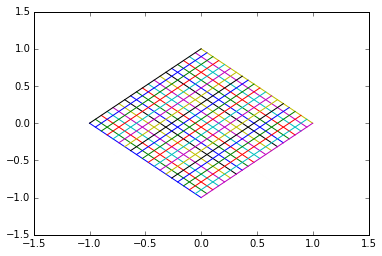

In [30]:
plt.plot(Z.real, Z.imag);
plt.plot(Z.T.real, Z.T.imag);
plt.axis([-1.5,1.5,-1.5,1.5]);

In [31]:
pierce_map(Z);

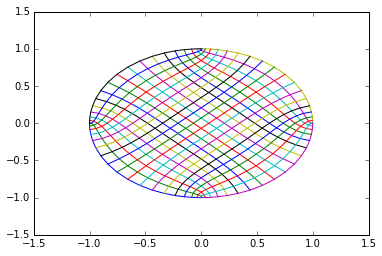

In [32]:
plt.plot(pierce_map(Z).real, pierce_map(Z).imag);
plt.plot(pierce_map(Z).T.real, pierce_map(Z).T.imag);
plt.axis([-1.5,1.5,-1.5,1.5]);